# Data Science Project
Mağaza müdürü vitrinlerinde tablet ürünlerini en doğru şekilde sergileyebilmek için 2.000 adet tableti fiyat/performans durumlarına göre “Ucuz”, “Normal”, “Pahalı”, “Çok Ucuz” olarak etiketlemiştir. 

Mağazasına yeni gelecek tablet ürünlerini etiketleyerek vakit kaybetmek istemeyen IT ekibi mevcut verilerle başarılı bir makine öğrenmesi algoritması geliştirmek istemektedir. Böylelikle yeni gelecek tablet ürünlerini hangi vitrinde sergilemeleri gerektiğini hızlı ve güvenilir şekilde elde edebileceklerdir.

IT ekip lideri bu projeyi keşifçi veri analizi, ön işleme ve tahmine dayalı analitik makine öğrenmesi olmak üzere 3 safha olarak planlamaktadır. 

Oncelikle ihtiyacimiz dogrultusunda kullanacagimiz kutuphaneleri import edelim.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno  
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm

filterwarnings('ignore')

from matplotlib.legend_handler import HandlerLine2D

Dizinde bulunan veri çerçevemizi tablet değişkenine atayalım. tablet değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
tablet = pd.read_csv('../input/tablet/tablet.csv')
df = tablet.copy()
df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz


# Kesifci Veri Analizi (Exploratory Data Analaysis)

In [3]:
df.head()
# veri cercevesinin ilk 5 gozlemini goruntuleyelim

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [4]:
df.sample(5)
# veri cercevemizin rastgele 5 gozlemini goruntuluyoruz

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
370,1957,Yok,0.9,Var,11.0,Yok,31,0.6,181,3,16,396,1732,3801.0,7,Var,Yok,Var,Pahalı,Kırmızı
1287,672,Var,0.6,Var,13.0,Yok,61,0.1,194,5,20,724,1127,1457.0,20,Var,Yok,Var,Çok Ucuz,Turkuaz
474,691,Var,2.7,Var,4.0,Var,33,0.9,108,4,8,951,962,424.0,15,Var,Var,Var,Çok Ucuz,Yeşil
1542,623,Yok,1.4,Var,0.0,Var,15,0.2,189,3,1,778,844,3510.0,18,Var,Yok,Var,Normal,Pembe
304,1741,Var,1.8,Yok,0.0,Yok,14,0.7,143,8,0,730,1895,3387.0,3,Var,Yok,Yok,Pahalı,Turkuaz


In [5]:
df.tail()
# veri cercevesinin son 5 gozlemini goruntuleyelim

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


In [6]:
df.shape
# 2000 gozlem ve 20 degiskenden olusuyor

(2000, 20)

In [7]:
df.info()
# burada veri setinin yapisal bilgilerini ogrenmek icin info fonk. kullanildi
# Her bir değişkenimizin kaçar adet olduğunu,değişkenlerin tipini ve bellek kullanımını görüntüledik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Bluetooth , CiftHat , 4G , 3G ,Dokunmatik , WiFi ve Renk gibi gözlemlerin ne kadar dengeli olup olmadigini sorgulayalim.

In [8]:
df["Bluetooth"].value_counts()

Yok    1010
Var     990
Name: Bluetooth, dtype: int64

In [9]:
df["CiftHat"].value_counts()

Var    1019
Yok     981
Name: CiftHat, dtype: int64

In [10]:
df["4G"].value_counts()

Var    1043
Yok     957
Name: 4G, dtype: int64

In [11]:
df["3G"].value_counts()

Var    1523
Yok     477
Name: 3G, dtype: int64

In [12]:
df["Dokunmatik"].value_counts()

Var    1006
Yok     994
Name: Dokunmatik, dtype: int64

In [13]:
df["WiFi"].value_counts()

Var    1014
Yok     986
Name: WiFi, dtype: int64

In [14]:
df["Renk"].value_counts()

Beyaz         194
Siyah         183
Turuncu       175
Mor           175
Kırmızı       168
Pembe         168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: Renk, dtype: int64

In [15]:
df.isna().sum().sum()
# veri cercevemizde toplam kac adet eksik deger oldugunu gozlemledik

17

In [16]:
df.isna().sum()
#burada eksik gozlemler hangi degiskenlere ait ve kacar adet goruntulemis oluyoruz.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

* RAM özniteliğinden 12 gözlemde ve OnKameraMP özniteliğinden 5 gözlemin eksik değer olduğunu görüntülüyoruz

In [17]:
df.describe().T
# Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


* Veri çerçevesindeki yüzdelik dilim, ortalama, std vb. gibi bazı temel istatistiksel ayrıntıları veya bir dizi sayısal değeri görüntülemiş olduk 

In [18]:
corr = df.corr() #Korelasyon degerini gozlemleyelim.
corr

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


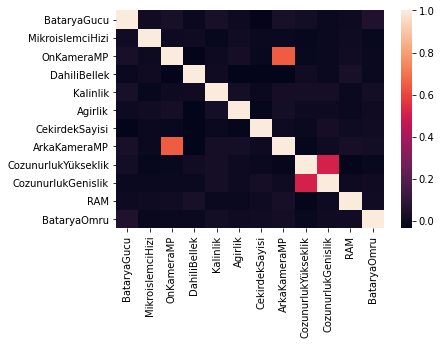

In [19]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

* Tablomuzun neredeyse tamamina yakini siyah renkte dolayisiyla oznitelikler arasindaki iliski yok denecek kadar az.
* Burada gozume carpan ilk iliski OnKameraMP ve ArkaKameraMP degerleri.
* Gozumuze carpan ikinci iliski ise CozunurlukYukseklik ve CozunurlukGenislik degerleri. Aralarindaki iliski zayif olsada bir iliski oldugunu gormekteyiz.

In [20]:
df.corr()["ArkaKameraMP"]["OnKameraMP"]

0.6456968663318242

* Burada korelasyon iliskisi en yuksek olan iki ozniteligimiz arasindaki korelasyon oranini 0.6456 seklinde bulmus oluyoruz fakat burada da guclu bir iliski var diyemeyiz orta duzeyde bir iliski oldugunu soyleyebiliriz.

In [21]:
df.corr()["CozunurlukYükseklik"]["CozunurlukGenislik"]

0.5106644191393149

* Burada aralarinda iliski olan bir diger CozunurlukYükseklik ve CozunurlukGenislik olan iki ozniteligimiz arasindaki korelasyon oranini 0.5106 seklinde bulmus oluyoruz fakat burada da guclu bir iliski vardir diyemeyiz orta duzeyde bir iliski oldugundan bahsedebiliriz.

Veri cercevemizin ozniteliklerini kendi icinde degerlendirelim.

In [22]:
df["FiyatAraligi"].unique()
# Buradan FiyatAraligi degiskenimizin 4 adet benzersiz degiskeni oldugunu gormus olduk

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [23]:
df['FiyatAraligi'].value_counts()
# Dengeli dagilim oldugunu gozlemlemis olduk.

Pahalı      500
Normal      500
Çok Ucuz    500
Ucuz        500
Name: FiyatAraligi, dtype: int64

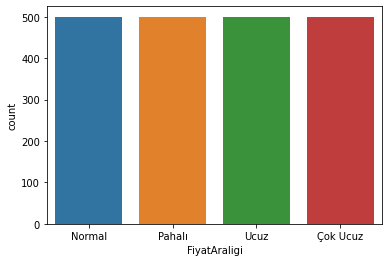

In [24]:
sns.countplot(x = "FiyatAraligi", data = df);

* Hepsinden esit sayida gozlem var dolayisiyla dengeli bir dagilim soz konusudur

Diger bazi ozniteliklerimizin de hem benzersiz degerlerini inceleyelim. Ayni zamanda farkli grafikler kullanarak inceleyelim.

In [25]:
df["ArkaKameraMP"].nunique()
# Buradan ArkaKameraMP degiskenimizin 21 adet benzersiz degiskeni oldugunu gormus olduk

21

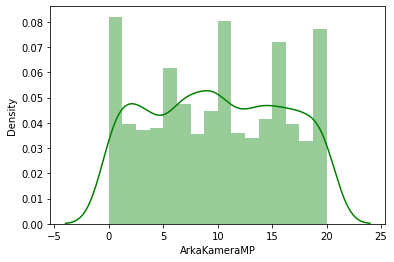

In [26]:
sns.distplot(df["ArkaKameraMP"], bins=16, color="green");
# displot -> dagilim gorsellestirmek icin kullanilan bir fonksiyon

In [27]:
df["OnKameraMP"].nunique()
# Buradan OnKameraMP degiskenimizin 20 adet benzersiz degiskeni oldugunu gormus olduk

20

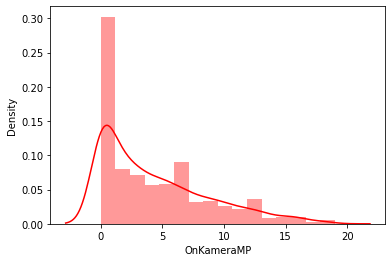

In [28]:
sns.distplot(df["OnKameraMP"], bins = 16, color="red");

In [29]:
df["MikroislemciHizi"].nunique()
# Buradan MikroislemciHizi degiskenimizin 26 adet benzersiz degiskeni oldugunu gormus olduk

26

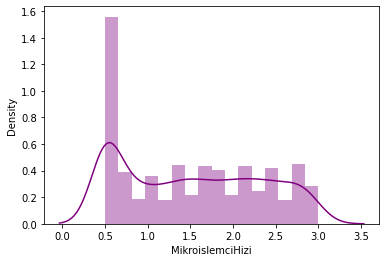

In [30]:
sns.distplot(df["MikroislemciHizi"], bins = 16, color = "purple");

* Bu grafigimizden MikroislemciHizi ile ilgili 0.5 ila 3.0 arasinda degerler aldigini gormekteyiz.

Simdi aralarinda iliski olan OnKameraMP ve ArkaKameraMP ozniteliklerinin grafigini inceleyelim. 

<Figure size 1296x360 with 0 Axes>

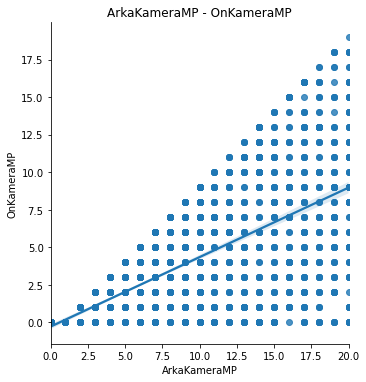

In [31]:
plt.figure(figsize=(18,5))
sns.lmplot(x="ArkaKameraMP", y="OnKameraMP", data=df)
plt.title('ArkaKameraMP - OnKameraMP')
plt.show()

* Buradaki grafigimizden ArkaKameraMP ozniteliginin degeri arttikca OnKameraMP degerimiz de artis gostermekte oldugunu soyleyebiliriz.

Simdi ise FiyatAraligi ozniteligimiz icin diger degiskenlerin dagilimini gorsellestirelim. Ilk olarak RAM degiskeni ile arasindaki iliskiyi goruntuleyelim.

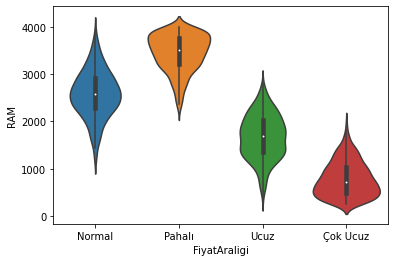

In [32]:
sns.violinplot(x = "FiyatAraligi", y = "RAM", data = df);

* Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla RAM degeri olacak oldugu sonucunu cikarabiliriz.

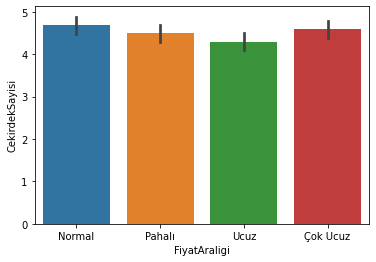

In [33]:
sns.barplot(x = "FiyatAraligi", y = "CekirdekSayisi", data = df);

* Buradaki grafigimizden FiyatAraligi ozniteligi ile CekirdekSayisi arasindaki iliskiyi goruntulemis olduk.

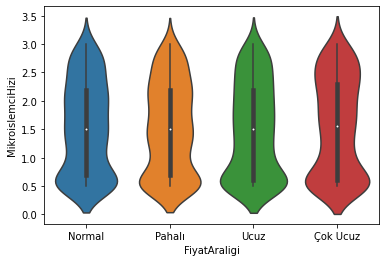

In [34]:
sns.violinplot(x = "FiyatAraligi", y = "MikroislemciHizi", data = df);

* Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla MikroislemciHizi degeri olacak oldugu sonucunu cikarabiliriz. Fakat aralarinda cok buyuk bir fark da bulunmamakta.

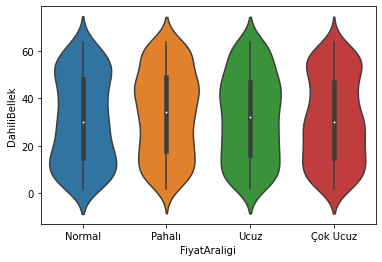

In [35]:
sns.violinplot(x = "FiyatAraligi", y = "DahiliBellek", data = df);

* Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla DahiliBellek degeri olacak oldugu sonucunu cikarabiliriz. Fakat aralarinda cok buyuk bir fark da bulunmamakta.

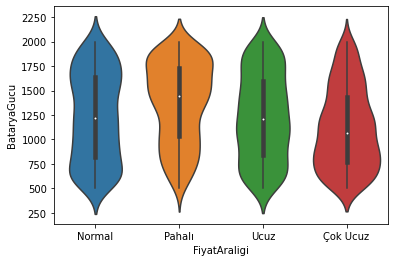

In [36]:
sns.violinplot(x = "FiyatAraligi", y = "BataryaGucu", data = df);

* Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla BataryaGucu oldugu sonucunu cikarabiliriz.

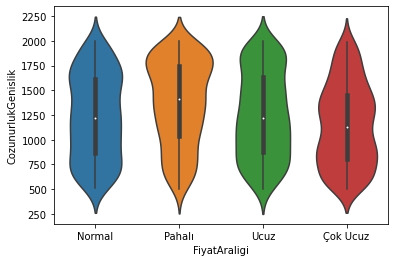

In [37]:
sns.violinplot(x = "FiyatAraligi", y = "CozunurlukGenislik", data = df);

* Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla CozunurlukGenislik degeri olacak oldugu sonucunu cikarabiliriz.

# Veri On Isleme (Data preprocessing)

In [38]:
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

In [39]:
df.isnull().sum() #Eksik değerleri tekrar gözlemleyelim.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

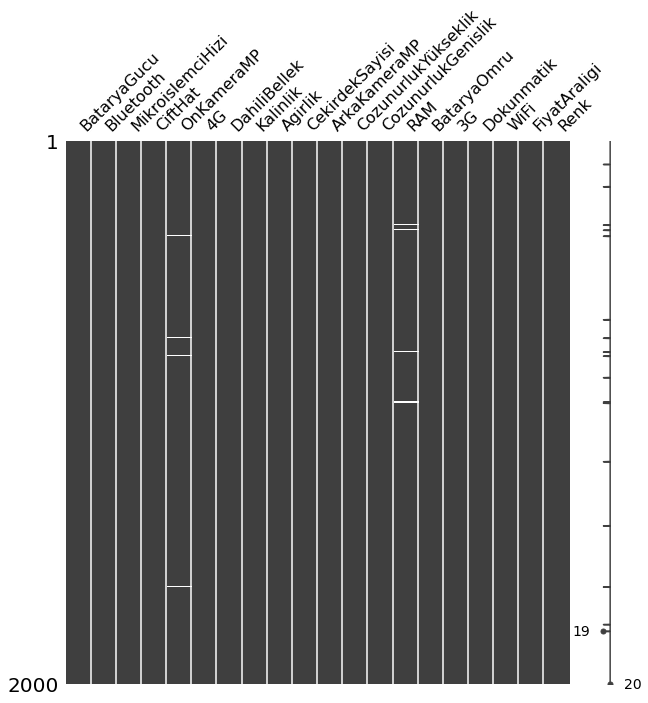

In [40]:
missingno.matrix(df,figsize=(10, 10)); #Şimdi de bu öznitelikleri görselleştirelim.

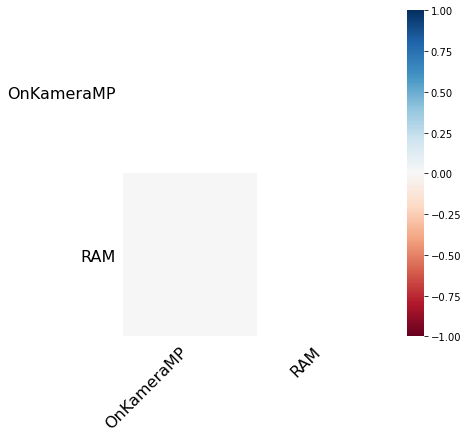

In [41]:
missingno.heatmap(df, figsize= (6,6));
#Daha anlaşılır hale getirmek için ısı haritası çizdirelim.

In [42]:
df = df.fillna(df.mean())  
df
#Eksik değerleri ortalama değerlerle doldurduk.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz


In [43]:
df.isnull().sum()
#Tekrar kontrol ederek eksik değer kalıp kalmadığına baktık.

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

In [44]:
df["Renk"].unique() 
#Renk e ait benzersiz değerleri görüntüleyelim.

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [45]:
df_Renk = pd.get_dummies(df["Renk"], prefix = "-", prefix_sep='Renk-', dummy_na=False, columns=None,dtype=None)
df_Renk   
#get_dummies yardımıyla Renk'e dair kategorik öznitelik çıkarımlarında bulunduk.
#Çünkü Renk lerin birbirine üstünlüğü yok, nominaller. Ordinal değil.

,-Renk-Beyaz,-Renk-Gri,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,0,0
1996,0,0,0,0,0,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,1,0
1998,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
df = pd.concat([df,df_Renk], axis=1)
df = df.drop("Renk", axis = 1)
df
# df veri setimizle yukarida olusturdugumuz df_Renk veri setimizi birlestirerek tek tablo haline getirdik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


In [47]:
categories=pd.Categorical(df['OnKameraMP'],ordered=True)  
print(categories)
#Ordinal değerleri inceledik

[2.0, 0.0, 1.0, 1.0, 1.0, ..., 3.0, 1.0, 4.0, 4.0, 5.0]
Length: 2000
Categories (21, float64): [0.0 < 1.0 < 2.0 < 3.0 ... 16.0 < 17.0 < 18.0 < 19.0]


In [48]:
categories = pd.Categorical(df['DahiliBellek'],ordered=True)
print(categories)

[50, 58, 16, 50, 18, ..., 7, 11, 56, 53, 26]
Length: 2000
Categories (63, int64): [2 < 3 < 4 < 5 ... 61 < 62 < 63 < 64]


* Ordinal değerleri sayısallaştırma işlemini gerçekleştirelim.

In [49]:
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Çok Ucuz",0)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Ucuz",1)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Normal",2)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Pahalı",3)

In [50]:
df.replace("Yok",0,inplace=True)   
df.replace("Var",1,inplace=True)

In [51]:
df
#df veri setimizi tekrar görüntüledik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


# Makine Ogrenmesi (Machine Learning)

In [52]:
df.head()
# veri setimizin ilk 5 gozlemini goruntuledik.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


Bu safhada modellemeleri yapabilmek için hedef degiskenimiz olan “FiyatAraligi” degiskeni ve bu degiskeni tahmin etmemize yardımcı olacak diğer değişkenler bağımlı ve bağımsız değişkenler olmak üzere ayrılmalıdır. 


Burada hedef degiskenimiz "FiyatAraligi" degiskeni oldugu icin bu degiskenimiz bagimli degiskenimiz olacaktir

In [53]:
X = df.drop("FiyatAraligi", axis = 1)
y = df["FiyatAraligi"]

* Burada veri setimizi bagimli ve bagimsiz degiskenler olmak uzere bolutledik.

In [54]:
y
# burada bagimli degiskenimizi goruntulemis olduk(FiyatAraligi)

0       2
1       3
2       1
3       3
4       2
       ..
1995    0
1996    1
1997    3
1998    2
1999    2
Name: FiyatAraligi, Length: 2000, dtype: int64

In [55]:
X
# burada ise bagimsiz degiskenlerimizi goruntulemis olduk

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

* Burada bağımlı ve bağımsız değişkenler %85 oranında eğitim ve %15 oranında test olmak üzere “train_test_split” metodunu kullanılarak ayirma islemini gerceklestirdik. 

4 parça değişkeni kontrol edelim.

In [57]:
X_train.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
581,1454,1,1.6,0,6.0,1,21,0.2,160,4,...,0,0,0,0,1,0,0,0,0,0
76,1254,0,1.2,1,2.0,0,50,0.7,108,5,...,0,0,0,0,0,0,0,1,0,0
1916,1762,0,0.6,0,3.0,1,26,0.1,83,6,...,0,0,0,1,0,0,0,0,0,0
1414,1876,0,1.3,1,9.0,1,64,1.0,98,3,...,0,0,0,0,0,0,0,0,0,1
780,1426,0,1.6,0,4.0,1,12,0.7,174,5,...,0,1,0,0,0,0,0,0,0,0


In [58]:
X_test.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,-Renk-Kahverengi,-Renk-Kırmızı,-Renk-Mavi,-Renk-Mor,-Renk-Pembe,-Renk-Sarı,-Renk-Siyah,-Renk-Turkuaz,-Renk-Turuncu,-Renk-Yeşil
1860,1433,1,2.3,0,2.0,1,5,0.1,129,5,...,0,0,0,0,0,0,0,0,0,0
353,1174,1,0.9,0,7.0,0,30,1.0,147,4,...,0,0,0,0,0,0,1,0,0,0
1333,999,0,2.6,1,11.0,1,56,1.0,165,4,...,0,0,0,0,1,0,0,0,0,0
905,972,1,0.5,1,5.0,0,13,0.4,193,5,...,0,0,0,0,0,0,0,1,0,0
1289,1811,1,2.5,0,4.0,1,5,0.6,98,4,...,0,0,0,0,0,1,0,0,0,0


In [59]:
y_train.head()

581     0
76      3
1916    2
1414    3
780     1
Name: FiyatAraligi, dtype: int64

In [60]:
y_test.head()

1860    1
353     0
1333    2
905     1
1289    2
Name: FiyatAraligi, dtype: int64

GaussianNB modeli yaratalım ve eğitimi gerçekleştirelim.

In [61]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [62]:
nb_model

GaussianNB()

In [63]:
dir(nb_model)
# bu nesnenin icerisinden alabilecegim bazi modeller bize sunulmus oldu
# linear regresyon modeline ait yazılabilecek komutları görüntüleyelim.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_smoothing']

In [64]:
nb_model.predict(X_test)[0:10]

array([2, 0, 3, 1, 2, 2, 3, 1, 2, 1])

* Burada modelimizin tahmin ettigi ilk 10 gozlemi goruntulemis olduk

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [65]:
y_pred = nb_model.predict(X_test)

Dogruluk skorumuzu goruntuleyelim.

In [66]:
accuracy_score(y_test, y_pred)

0.7633333333333333

* accuracy_score(y_test, y_pred) -> y_test ogesinin bir y_pred ogesine esit oldugu tum dizinleri sayar ve ardindan onu listedeki toplam oge sayina boler.

* Buradan gorulmus oldugu gibi %76.3 oraninda dogru tahminde bulundugunu goruntulemis olduk.

Karmasiklik matrisini yazdiralim.

Confusion Matrix, veri setindeki var olan durum ile sınıflandırma modelimizin doğru ve yanlış tahminlerinin sayısını tablo olarak göstermektir. Şöylede açıklayabiliriz; makine öğrenimi modellerinden tahmin edilen ve gerçek sınıf etiketlerini göstermek için, karmaşıklık matrisi kullanılır.

In [67]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[76 11  0  0]
 [ 4 57 10  0]
 [ 0 18 41 12]
 [ 0  1 15 55]]


Karmasiklik matris skorunu hesaplayalim.

In [68]:
(karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1]+karmasiklik_matrisi[2][2] + karmasiklik_matrisi[3][3]) / (karmasiklik_matrisi[0][0] + karmasiklik_matrisi[1][1] +  karmasiklik_matrisi[1][0] + karmasiklik_matrisi[0][1]+karmasiklik_matrisi[0][2]  + karmasiklik_matrisi[1][2]+karmasiklik_matrisi[0][3] + karmasiklik_matrisi[1][3]+karmasiklik_matrisi[2][1] + karmasiklik_matrisi[2][2]+karmasiklik_matrisi[2][3] + karmasiklik_matrisi[2][0]+karmasiklik_matrisi[3][0] + karmasiklik_matrisi[3][1]+karmasiklik_matrisi[3][2] + karmasiklik_matrisi[3][3])

0.7633333333333333

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [69]:
cross_val_score(nb_model, X_test, y_test, cv = 10)

array([0.73333333, 0.66666667, 0.73333333, 0.66666667, 0.66666667,
       0.46666667, 0.5       , 0.46666667, 0.66666667, 0.63333333])

Bu 10 kez katlayarak aldığımız skorların ortalamasını alalım.

In [70]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.6200000000000001

Siniflandirma raporu ile yazdiralim.

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        87
           1       0.66      0.80      0.72        71
           2       0.62      0.58      0.60        71
           3       0.82      0.77      0.80        71

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.77      0.76      0.77       300



 Hassasiyet (Precision): Doğru olarak tahmin edilenlerin, toplama oranıdır. Doğru ne kadar tahmin edildiğinin bir ölçüsüdür. 0 ile 1 arasında değer alır, mümkün olduğunca yüksek olmalıdır.

Kesinlik skorunu görüntüleyelim.

In [72]:
PrecisionScore = precision_score(y_test, y_pred, average='weighted')
PrecisionScore

0.771856280249744

 Recall (Geri çağırma): Pozitif durumların ne kadar başarılı tahmin edildiğini gösterir. En iyi değer 1, en kötü değer 0’dır.

In [73]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore

0.7633333333333333

F1 Score (F1 Değerlendirme): Test edilen verilerin doğruluğunun ölçümüdür. Hassasiyet ve geri çağırma metriklerinin harmonik ortalamasıdır. Normal ortalama yerine harmonik ortalamasının alınmasının sebebi, uç durumların göz ardı edilmesinden kaynaklanmaktadır.

In [74]:
F1Score = f1_score(y_test, y_pred, average = 'weighted')  
F1Score

0.7650134336909835

Modelin daha iyi doğruluk skoru vermesi için ne yapabiliriz? Feature Selection?

In [75]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [76]:
X.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', '-Renk-Beyaz', '-Renk-Gri',
       '-Renk-Kahverengi', '-Renk-Kırmızı', '-Renk-Mavi', '-Renk-Mor',
       '-Renk-Pembe', '-Renk-Sarı', '-Renk-Siyah', '-Renk-Turkuaz',
       '-Renk-Turuncu', '-Renk-Yeşil'],
      dtype='object')

Kaç adet özniteliğimiz var ?

In [77]:
len(X.columns)

30

Feature Selection yöntemi için Scikit-learn kütüphanesinde bulunan, her bir bağımsız değişken için istatistik hesaplandıktan sonra filtreleme yapmamızı sağlayan KBest tekniğini kullanacağız.

k parametresi olarak 30 değişkenimiz olduğu için ve 30 tanesinin de skorlarını görüntülemek için 30 giriyoruz.

In [78]:
test = SelectKBest(k = 30)
test

SelectKBest(k=30)

Bağımlı ve bağımsız değişkenleri oluşturduğumuz test nesnesine parametre olarak girelim ve eğitelim.

In [79]:
fit = test.fit(X, y)
fit

SelectKBest(k=30)

Tüm skorları görüntüleyelim.

In [80]:
set_printoptions(precision = 3)  
print(fit.scores_)
# precision, ondalıklı sayının virgülden sonra gelecek karakter adedini verir.

[3.160e+01 4.768e-01 4.937e-01 4.282e-01 7.302e-01 1.060e+00 2.923e+00
 1.501e+00 3.594e+00 2.625e+00 8.254e-01 1.948e+01 2.262e+01 3.286e+03
 1.629e+00 4.573e-01 1.293e+00 2.849e-01 7.985e-01 7.425e-01 1.852e+00
 3.287e-01 8.546e-01 5.901e-01 4.846e-01 2.221e-01 1.305e+00 2.380e+00
 5.734e-01 2.452e+00]


Daha iyi görüntülemek için bir döngü yazalım ve karşılıklarına öznitelik isimlerini de yazdıralım.

In [81]:
for indis, skor in enumerate(fit.scores_):
    print(skor, " -> ", X.columns[indis])

31.59815753989697  ->  BataryaGucu
0.4767677091173118  ->  Bluetooth
0.4937078010279965  ->  MikroislemciHizi
0.42823928557591956  ->  CiftHat
0.7302215314309588  ->  OnKameraMP
1.0595245262724162  ->  4G
2.9229960794176044  ->  DahiliBellek
1.5006824396682334  ->  Kalinlik
3.5943181851549952  ->  Agirlik
2.6254151540861677  ->  CekirdekSayisi
0.8254463576889531  ->  ArkaKameraMP
19.484841776704883  ->  CozunurlukYükseklik
22.62088249061287  ->  CozunurlukGenislik
3285.8633430873674  ->  RAM
1.6288113087354124  ->  BataryaOmru
0.4573197497054951  ->  3G
1.2933022318768157  ->  Dokunmatik
0.2849404695197208  ->  WiFi
0.7985277644423007  ->  -Renk-Beyaz
0.7424648216639064  ->  -Renk-Gri
1.8515556048444877  ->  -Renk-Kahverengi
0.328747648644668  ->  -Renk-Kırmızı
0.8546411492461239  ->  -Renk-Mavi
0.5900785144514252  ->  -Renk-Mor
0.4845836368050425  ->  -Renk-Pembe
0.2221109441940691  ->  -Renk-Sarı
1.305164828542163  ->  -Renk-Siyah
2.379774003890458  ->  -Renk-Turkuaz
0.57338347435495

Doğruluk skorunu yükseltmek istiyoruz, bu yüzden sadece en anlamlı olan (skoru 4 haneli olan) öznitelikleri seçelim ve tekrardan model kurup eğitelim.--> 4 haneli skoru olan bir tek RAM ozniteligimizdir.

In [82]:
X = df[["RAM"]]
y = df["FiyatAraligi"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

* Burada bağımlı ve bağımsız değişkenler %85 oranında eğitim ve %15 oranında test olmak üzere “train_test_split” metodunu kullanılarak ayirma islemini gerceklestirdik.

In [84]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [85]:
y_pred = nb_model.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.77

Feature Selection yaparak dogruluk skorumuz artmis bulunmakta. Capraz dogrulama ile teyit edelim.

In [87]:
cross_val_score(nb_model, X_test, y_test, cv = 10)

array([0.7  , 0.767, 0.867, 0.767, 0.8  , 0.767, 0.833, 0.8  , 0.6  ,
       0.767])

Bu 10 kez katlayarak aldığımız skorların ortalamasını alalım.

In [88]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7666666666666667

Karmaşıklık matrisi çizdirelim.

In [89]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[74 13  0  0]
 [10 48 13  0]
 [ 1 12 46 12]
 [ 0  0  8 63]]


Sınıflandırma raporuna bakalım.

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        87
           1       0.66      0.68      0.67        71
           2       0.69      0.65      0.67        71
           3       0.84      0.89      0.86        71

    accuracy                           0.77       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.77      0.77      0.77       300



# Decision Tree (Karar Ağacı) Algoritması

Modelimizi inşa edelim ve eğitelim.

In [91]:
#cart = DecisionTreeClassifier(random_state = 42)
cart = DecisionTreeClassifier(random_state = 42, criterion='entropy')
cart_model = cart.fit(X_train, y_train)

Modelin parametrelerini ve aldığı varsayılan değerleri görüntülemek için model ismini yazabiliriz.

In [92]:
cart_model
#Information Gain hesaplama için criterion='entropy'

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [93]:
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi',
       '-Renk-Beyaz', '-Renk-Gri', '-Renk-Kahverengi', '-Renk-Kırmızı',
       '-Renk-Mavi', '-Renk-Mor', '-Renk-Pembe', '-Renk-Sarı', '-Renk-Siyah',
       '-Renk-Turkuaz', '-Renk-Turuncu', '-Renk-Yeşil'],
      dtype='object')

Parametreleri optimize etmeden kurduğumuz bu model için tahminlerde bulunalım.

In [94]:
y_pred = cart_model.predict(X_test)

Daha önce hiç görmediği X_test verileri için bulunduğu tahminlere göre doğruluk skorunu görüntüleyelim.

In [95]:
accuracy_score(y_test, y_pred)

0.6566666666666666

Modelin tüm verileri öğrendiği görülmekte. Karmaşıklık matrisini görüntüleyelim.

In [96]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[71 14  2  0]
 [14 36 19  2]
 [ 1 17 37 16]
 [ 0  1 17 53]]


Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [97]:
cross_val_score(cart_model, X, y, cv = 10)

array([0.685, 0.73 , 0.675, 0.64 , 0.67 , 0.665, 0.655, 0.67 , 0.655,
       0.695])

10 skorun ortalamasına bakalım.

In [98]:
cross_val_score(cart_model, X, y, cv = 10).mean()

0.6740000000000002

Hedef özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        87
           1       0.53      0.51      0.52        71
           2       0.49      0.52      0.51        71
           3       0.75      0.75      0.75        71

    accuracy                           0.66       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.66      0.66      0.66       300



Modelin karar ağacını çizdirerek karar ağacının neye benzediğini tekrardan hatırlayalım.

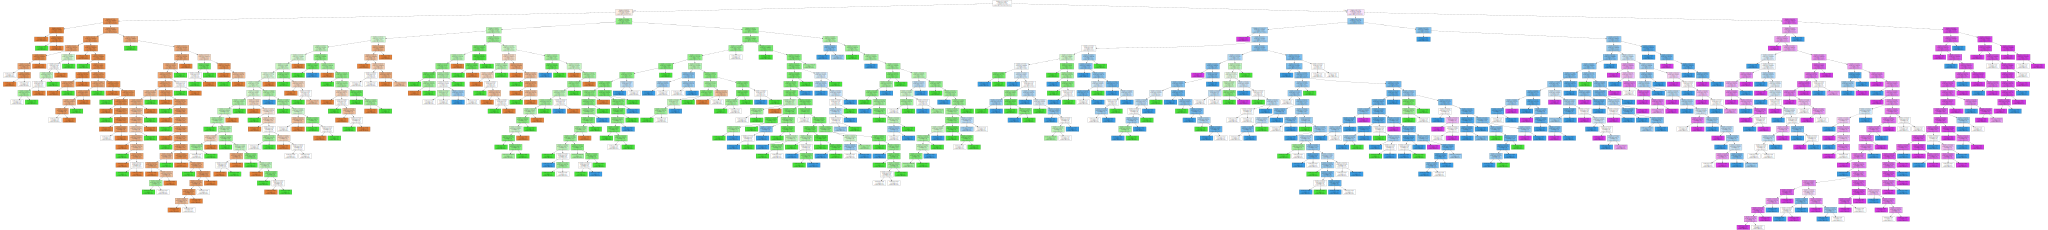

In [100]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(cart, out_file = None, feature_names = X.columns, filled = True))
display(SVG(graph.pipe(format = 'svg')))

Modelin karar ağacını oluştururken root node için RAM'e dayanarak karar verdiğini görüyoruz. Özniteliklerin karar ağacına göre önem sıralamasına bakalım.

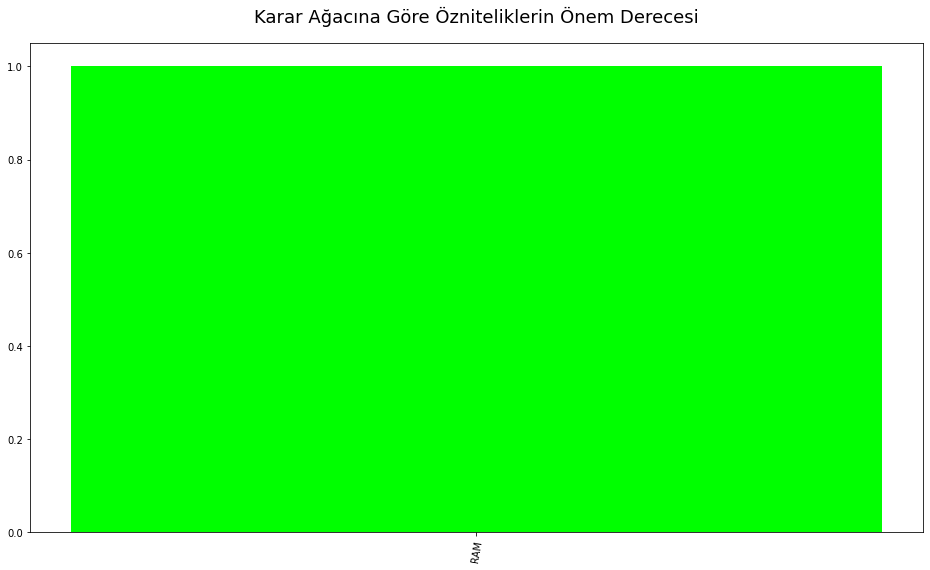

In [101]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize = (16, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

# K Nearest Neighbor (K En Yakın Komşu) Algoritması

Veri çerçevemizi bağımlı ve bağımsız olarak bölütleyip, eğitim ve test olarak da parçalamıştık. Şimdi aynı eğitim verileri üzerinden KNN modeli kuralım ve eğitelim.

In [102]:
knn_params = {"n_neighbors": np.arange(2,50)}

* Burada en yakin komsu sayisini 2 ila 50 arasinda hepsini deneyecek.

In [103]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [104]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.748820585687488
En iyi parametreler: {'n_neighbors': 34}


* En iyi komşu değerinin 34 olduğu gözlenmektedir.

In [105]:
knn_tuned = KNeighborsClassifier(34)
knn_tuned = knn_tuned.fit(X_train, y_train)

In [106]:
y_pred = knn_tuned.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.7566666666666667

* Dogruluk skoru %75 oldugu gorulmekte. 

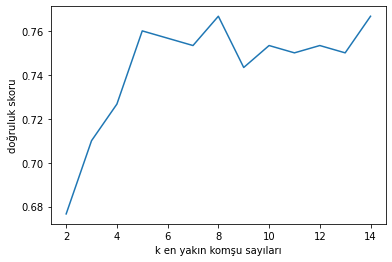

In [108]:
score_list = []

for each in range(2,15,1):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test, y_test))

plt.plot(range(2,15,1),score_list)
plt.xlabel("k en yakın komşu sayıları")
plt.ylabel("doğruluk skoru")
plt.show()

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [109]:
cross_val_score(knn_tuned, X_test, y_test, cv = 10)

array([0.7  , 0.733, 0.867, 0.8  , 0.767, 0.767, 0.833, 0.8  , 0.6  ,
       0.767])

10 skorun ortalamasına bakalım.

In [110]:
cross_val_score(knn_tuned, X_test, y_test, cv = 10).mean()

0.7633333333333333

Hiçbir parametre optimizasyonu yapmadığımız için, parametreleri ve varsayılan değerleri inceleyelim.

In [111]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [112]:
knn_model

KNeighborsClassifier()

Bu parametre değerleri üzerinden eğitilen modelimizin tüm gözlemler için tahminde bulunmasını isteyelim.

In [113]:
y_pred = knn_model.predict(X)

Tüm gözlemler için bulunduğu tahminlere göre doğruluk skorunu görüntüleyelim.

In [114]:
accuracy_score(y, y_pred)

0.793

Modelin tüm verileri öğrendiği görülmekte. Karmaşıklık matrisini görüntüleyelim.

In [115]:
karmasiklik_matrisi = confusion_matrix(y, y_pred)
print(karmasiklik_matrisi)

[[432  67   1   0]
 [ 54 389  57   0]
 [  1  96 328  75]
 [  0   6  57 437]]


Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [116]:
cross_val_score(cart_model, X, y, cv = 10)

array([0.685, 0.73 , 0.675, 0.64 , 0.67 , 0.665, 0.655, 0.67 , 0.655,
       0.695])

10 skorun ortalamasına bakalım.

In [117]:
cross_val_score(cart_model, X, y, cv = 10).mean()

0.6740000000000002

Hedef özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [118]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       500
           1       0.70      0.78      0.74       500
           2       0.74      0.66      0.70       500
           3       0.85      0.87      0.86       500

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

